## Scouting System Test

1. Ensure the PostgreSQL database is running. (Type `pg_ctl start` at a command prompt or start the PostgreSQL service using the Windows *Services* tool.

2. Select *Run All* from the Jupyter Notebook *Cell* menu.

### 1. Package Imports

In [11]:
# Import packages used by scouting system
import sys
import os
import re

import pandas as pd
import sqlalchemy as sa

In [12]:
# Import scouting system packages
# import server.scouting.output as out
from server.model.event import EventDal

### 2. Database Connection

In [13]:
# Get a database connection
connection_string = ('postgresql://irs1318:irs1318'
                     '@localhost:5432/scouting')
engine = sa.create_engine(connection_string)
conn = engine.connect()

### 3. Plot Settings

In [14]:
# This section is necessary for viewing plots in the notebook.
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use("ggplot")

### 4. Set Event and Match

In [15]:
# Set Current Event
event_name = "turing"
event_id = EventDal.set_current_event("turing", "2017")
EventDal.set_current_match("112-q")
event_id

18193

### 5. Get a Dataframe Containing all Measures
Verify a Pandas dataframe (table) is visible below this cell. 

In [17]:
# Get Measures Dataframe
# sql_measures = sa.text(
#     "SELECT events.name AS event, events.season AS season, matches.name AS match, levels.name AS level, dates.name AS date, "
#     "teams.name AS team, alliances.name AS alliance, "
#     "stations.name AS station, phases.name AS phase, actors.name AS actor, tasks.name AS task, "
#     "measures.capability AS capability, measures.successes as successes, measures.attempts AS attempts, "
#     "measures.cycle_times as cycle_times, measuretypes.name AS measuretype, reasons.name AS reason, "
#     "attempts.name AS attempt "
#     "FROM ((((((((((((measures FULL OUTER JOIN teams ON measures.team_id=teams.id) "
#     "LEFT JOIN events ON measures.event_id=events.id) "
#     "LEFT JOIN matches ON measures.match_id=matches.id) "
#     "LEFT JOIN levels ON measures.level_id=levels.id) "
#     "LEFT JOIN dates ON measures.date_id=dates.id) "
#     "LEFT JOIN alliances ON measures.alliance_id=alliances.id) "
#     "LEFT JOIN stations ON measures.station_id=stations.id) "
#     "LEFT JOIN phases ON measures.phase_id=phases.id) "
#     "LEFT JOIN actors ON measures.actor_id=actors.id) "
#     "LEFT JOIN tasks ON measures.task_id=tasks.id) "
#     "LEFT JOIN reasons ON measures.reason_id=reasons.id) "
#     "LEFT JOIN measuretypes ON measures.measuretype_id=measuretypes.id) "
#     "LEFT JOIN attempts ON measures.attempt_id=attempts.id "
#     "WHERE events.id=" + str(event_id) + ";")

sql_measures = sa.text(
    "SELECT events.name AS event, events.season AS season, levels.name AS level, matches.name AS match, "
    "dates.name AS date, teams.name AS team, alliances.name AS alliance, stations.name AS station, "
    "phases.name AS phase, actors.name AS actor, tasks.name as task, measuretypes.name AS measuretype, "
    "reasons.name AS reason, "
    "measures.capability AS capability, measures.successes AS successes, measures.attempts AS attempts, "
    "measures.cycle_times as cycle_times "
    "FROM measures FULL OUTER JOIN teams ON measures.team_id=teams.id "
    "LEFT JOIN tasks ON measures.task_id=tasks.id "
    "LEFT JOIN events ON measures.event_id=events.id "
    "LEFT JOIN matches ON measures.match_id=matches.id "
    "LEFT JOIN levels ON measures.level_id=levels.id "
    "LEFT JOIN dates ON measures.date_id=dates.id "
    "LEFT JOIN alliances ON measures.alliance_id=alliances.id "
    "LEFT JOIN stations ON measures.station_id=stations.id "
    "LEFT JOIN phases ON measures.phase_id=phases.id "
    "LEFT JOIN actors ON measures.actor_id=actors.id "
    "LEFT JOIN measuretypes ON measures.measuretype_id=measuretypes.id "
    "LEFT JOIN reasons ON measures.reason_id=reasons.id "
    "WHERE event_id=:evt_id;"

).bindparams(evt_id=event_id)
measures = pd.read_sql(sql_measures, conn)
measures

,event,season,level,match,date,team,alliance,station,phase,actor,task,measuretype,reason,capability,successes,attempts,cycle_times
0,turing,2017,qual,001-q,2017-04-20T08:30:00,1983,blue,2,auto,robot,placeGear,boolean,na,0,0,1,0
1,turing,2017,qual,001-q,2017-04-20T08:30:00,1983,blue,2,auto,robot,holdGear,boolean,na,0,1,1,0
2,turing,2017,qual,003-q,2017-04-20T08:46:00,948,red,2,auto,robot,moveBaseline,boolean,na,0,1,1,0
3,turing,2017,qual,003-q,2017-04-20T08:46:00,6431,red,3,auto,robot,moveBaseline,boolean,na,0,1,1,0
4,turing,2017,qual,001-q,2017-04-20T08:30:00,1983,blue,2,teleop,robot,placeGear,count,na,0,2,2,0
5,turing,2017,qual,001-q,2017-04-20T08:30:00,1983,blue,2,teleop,robot,pickupGearRetrival,boolean,na,0,1,1,0
6,turing,2017,qual,002-q,2017-04-20T08:38:00,2761,blue,2,auto,robot,holdGear,boolean,na,0,0,0,0
7,turing,2017,qual,002-q,2017-04-20T08:38:00,2761,blue,2,auto,robot,placeGear,boolean,na,0,0,0,0
8,turing,2017,qual,002-q,2017-04-20T08:38:00,2761,blue,2,teleop,robot,pickupGearRetrival,boolean,na,0,0,0,0
9,turing,2017,qual,002-q,2017-04-20T08:38:00,2990,blue,3,auto,robot,shootHighBoiler,count,na,0,0,0,0


### 6. Number of Completed Matches

In [18]:
sql = "SELECT * FROM status"
pd.read_sql(sql, conn)

,id,match,ver,event_id
0,1,112-q,2018.03,18193


In [19]:
# Set recent_matches to n to filter out all but the last n matches.
recent_matches= 12

select_recent_matches = sa.text(
    "with current AS (SELECT s.event_id, s.match, date from schedules sched, "
    "status s WHERE sched.event_id = s.event_id "
    "AND sched.match = s.match limit 1 ) "


    "SELECT * FROM ( "
    "SELECT row_number() over (partition by team order by sched.date desc) as r, "
    " sched.* from schedules sched, current c WHERE sched.event_id = c.event_id and sched.date <= c.date )"
    " row_schedule WHERE row_schedule.r <= :rec_mtchs "
    " ORDER by team, date desc").bindparams(rec_mtchs=recent_matches)
df = pd.read_sql(select_recent_matches, conn)
num_matches = df[['team', 'level']].groupby('team').count()
num_matches.columns = ['matches']
df

,r,id,date,level,match,alliance,team,station,event_id
0,1,18895,2017-04-21T18:20:00,qual,112-q,red,108,1,18193
1,2,18776,2017-04-21T15:40:00,qual,092-q,red,108,2,18193
2,3,18700,2017-04-21T13:56:00,qual,079-q,blue,108,1,18193
3,4,18671,2017-04-21T13:16:00,qual,074-q,blue,108,2,18193
4,5,18567,2017-04-21T09:04:00,qual,057-q,red,108,3,18193
5,6,18534,2017-04-21T08:16:00,qual,051-q,blue,108,3,18193
6,7,18442,2017-04-20T15:12:00,qual,036-q,blue,108,1,18193
7,8,18374,2017-04-20T11:42:00,qual,025-q,red,108,2,18193
8,9,18331,2017-04-20T10:46:00,qual,018-q,red,108,1,18193
9,10,18251,2017-04-20T08:54:00,qual,004-q,blue,108,2,18193


### 7. Gears Dataframe
Verify a dataframe is visible below this window.

In [20]:
# Create summary dataframe for placing gears
gears_df = measures.query("task == 'placeGear'").query("phase == 'auto' or phase == 'teleop'").groupby('team').sum()
gears_df['average'] = gears_df['successes'] / num_matches['matches']
gears_df = gears_df.sort_values('average', ascending = False)

gears_df

,capability,successes,attempts,cycle_times,average
team,,,,,
1296,0,47,50,0,4.700000
4206,0,47,54,0,4.700000
3737,0,44,46,0,4.400000
399,0,46,50,0,4.181818
3245,0,41,46,0,4.100000
3997,0,41,50,0,4.100000
4451,0,41,45,0,4.100000
4587,0,38,42,0,3.800000
5802,0,36,42,0,3.600000


### 8. Gears Chart
Verify a bar chart is visible below this cell.

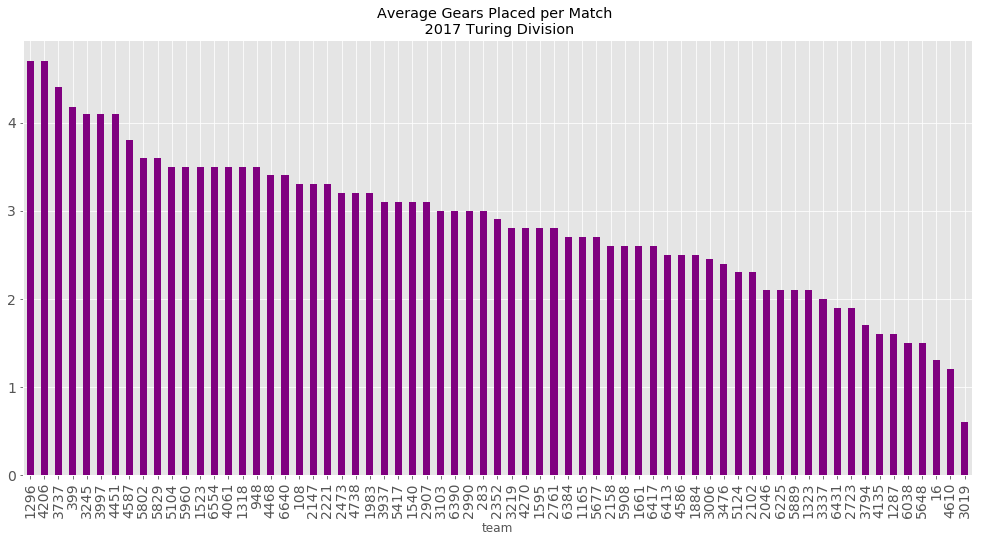

In [21]:
plt.figure()
gears_df.loc[:, "average"].plot(kind="bar", figsize=(17, 8), title="Average Gears Placed per Match \n 2017 Turing Division",
                                color="purple", fontsize=14)